> ( 1/20) camgeom=ASTRICam


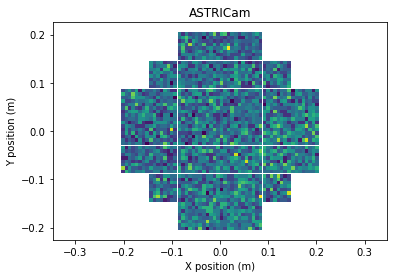

> ( 2/20) camgeom=CHEC


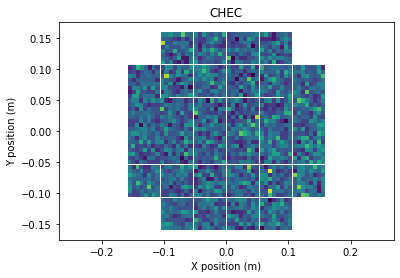

> ( 3/20) camgeom=DigiCam


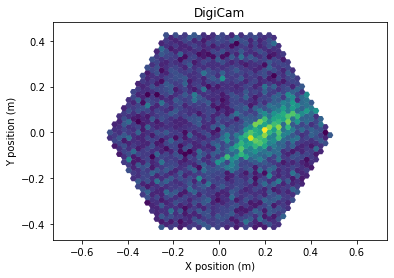

> ( 4/20) camgeom=FACT


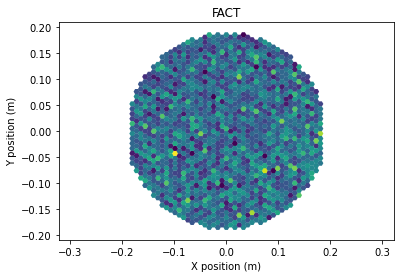

> ( 5/20) camgeom=FlashCam


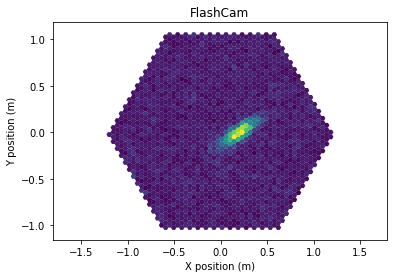

> ( 6/20) camgeom=HESS-I


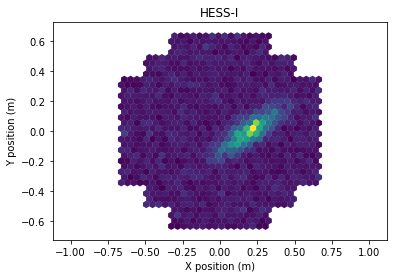

> ( 7/20) camgeom=HESS-II


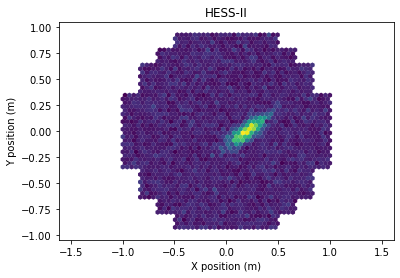

> ( 8/20) camgeom=LSTCam


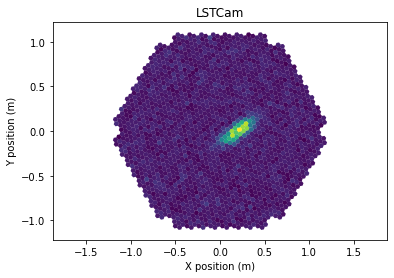

> ( 9/20) camgeom=LSTCam-002


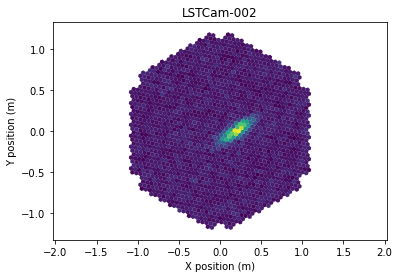

> (10/20) camgeom=LSTCam-003


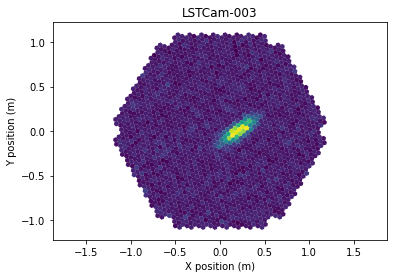

> (11/20) camgeom=MAGICCam


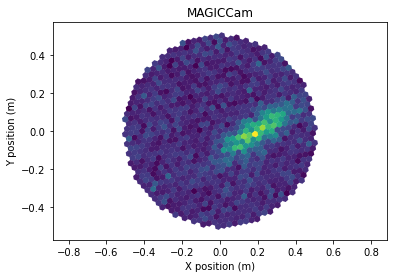

> (12/20) camgeom=MAGICCamMars


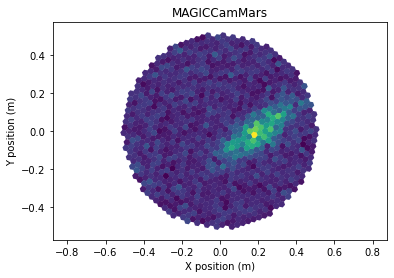

> (13/20) camgeom=NectarCam


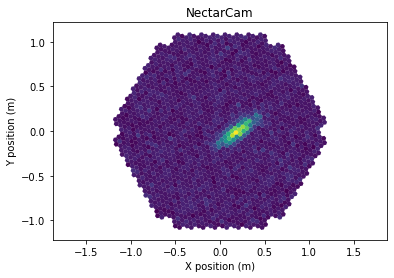

> (14/20) camgeom=NectarCam-003


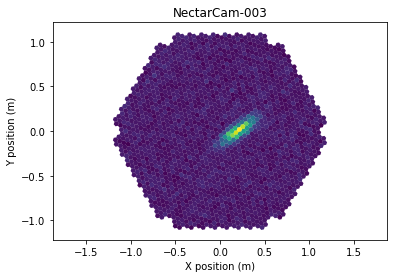

> (15/20) camgeom=SCTCam


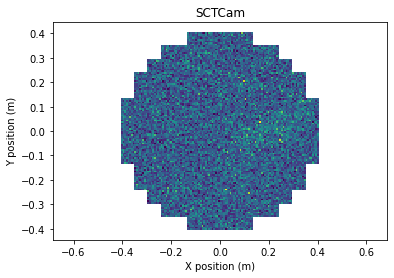

> (16/20) camgeom=VERITAS


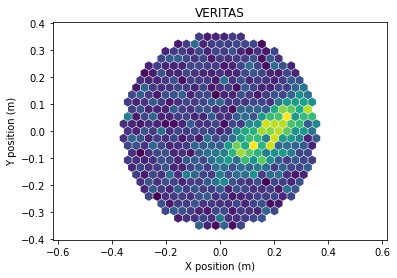

> (17/20) camgeom=Whipple109


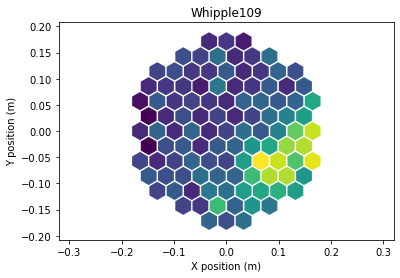

> (18/20) camgeom=Whipple151


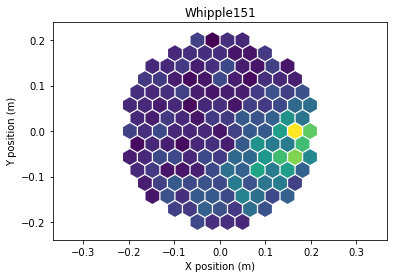

> (19/20) camgeom=Whipple331


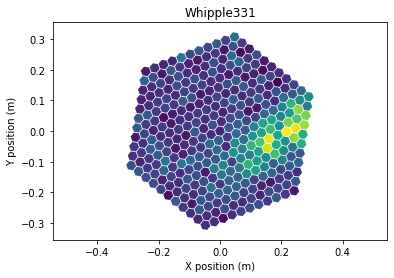

> (20/20) camgeom=Whipple490


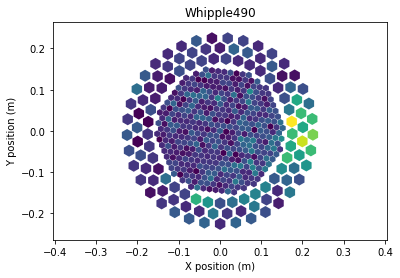

In [1]:
import astropy.units     as u
import matplotlib.pyplot as plt

from ctapipe.image         import toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

camgeoms = (
	'ASTRICam',
	'CHEC',
	'DigiCam',
	'FACT',
	'FlashCam',
	# 'hess',
	'HESS-I',
	'HESS-II',
	'LSTCam',
	'LSTCam-002',
	'LSTCam-003',
	'MAGICCam',
	'MAGICCamMars',
	'NectarCam',
	'NectarCam-003',
	'SCTCam',
	'VERITAS',
	'Whipple109',
	'Whipple151',
	'Whipple331',
	'Whipple490'
)

camgeoms_len = len(camgeoms)

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom  = CameraGeometry.from_name(camgeom)
	model = toymodel.Gaussian(x = 0.2 * u.m, y = 0.0 * u.m, width = 0.05 * u.m, length = 0.15 * u.m, psi = '35d')

	image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

	disp = CameraDisplay(geom, image=image)
	plt.show(disp)

> (1/5) camgeom=HESS-I


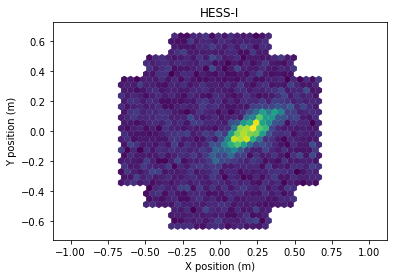

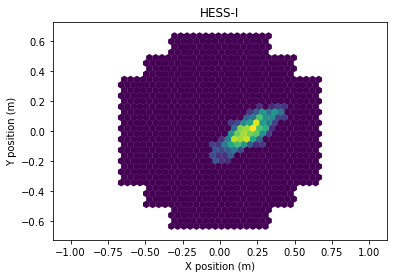

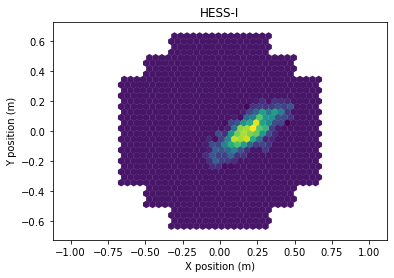

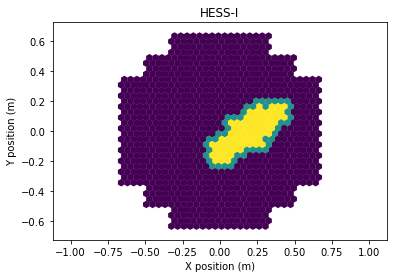

> (2/5) camgeom=HESS-II


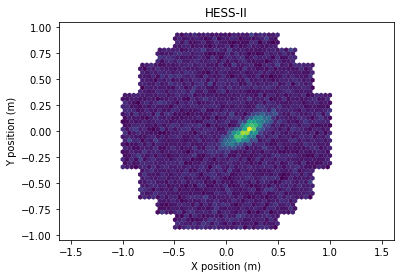

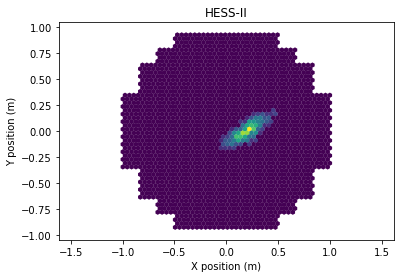

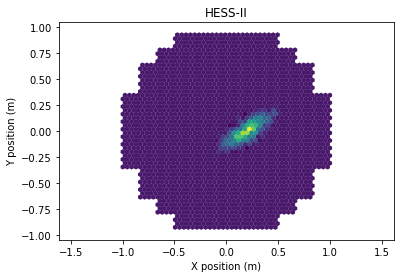

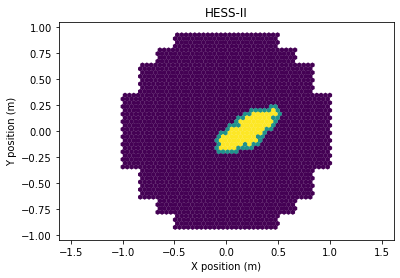

> (3/5) camgeom=VERITAS


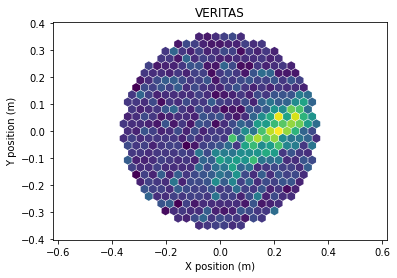

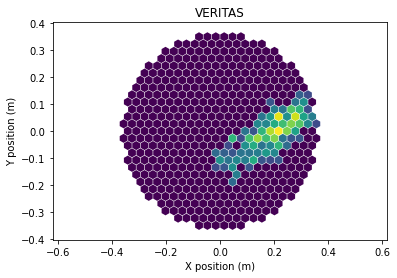

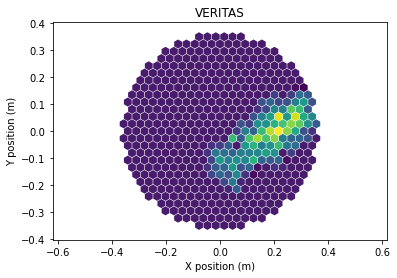

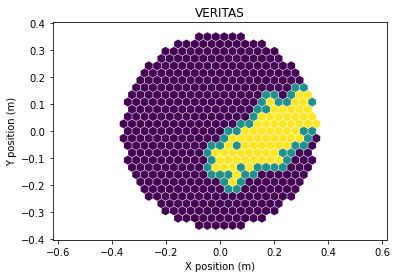

> (4/5) camgeom=Whipple109


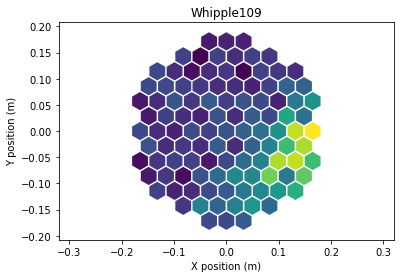

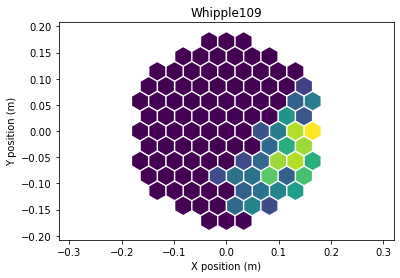

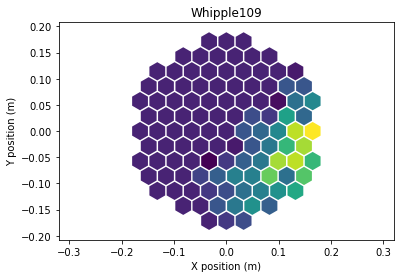

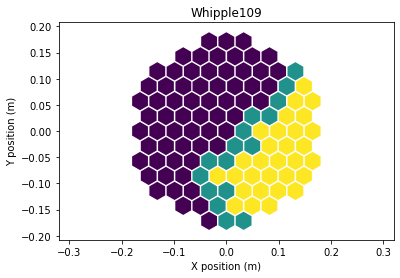

> (5/5) camgeom=Whipple151


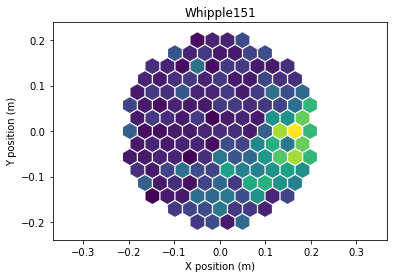

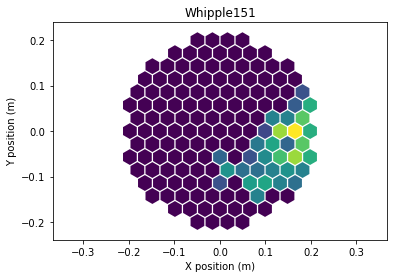

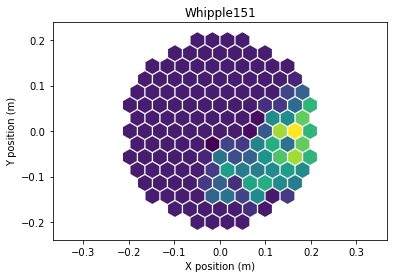

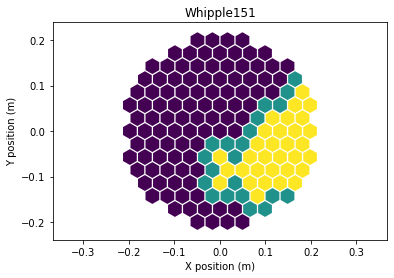

In [2]:
import astropy.units     as u
import matplotlib.pyplot as plt

from ctapipe.image         import dilate, tailcuts_clean, toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

camgeoms = (
	'HESS-I',
	'HESS-II',
	'VERITAS',
	'Whipple109',
	'Whipple151'
)

camgeoms_len = len(camgeoms)

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom  = CameraGeometry.from_name(camgeom)
	model = toymodel.Gaussian(x = 0.2 * u.m, y = 0.0 * u.m, width = 0.05 * u.m, length = 0.15 * u.m, psi = '35d')

	image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

	disp = CameraDisplay(geom, image=image)
	plt.show(disp)

	cleanmask         = tailcuts_clean(geom, image, picture_thresh=10, boundary_thresh=5)
	clean             = image.copy()
	clean[~cleanmask] = 0.0

	disp = CameraDisplay(geom, image=clean)
	plt.show(disp)

	cleanmask_dilated                 = dilate(geom, cleanmask)
	clean_dilated                     = image.copy()
	clean_dilated[~cleanmask_dilated] = 0.0

	disp = CameraDisplay(geom, image=clean_dilated)
	plt.show(disp)

	cleanmasks_visualized = cleanmask.astype(int) + cleanmask_dilated.astype(int)

	disp = CameraDisplay(geom, image=cleanmasks_visualized)
	plt.show(disp)

> (1/5) camgeom=HESS-I


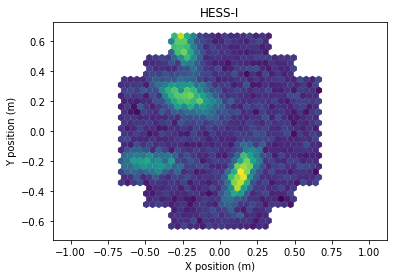

> (2/5) camgeom=HESS-II


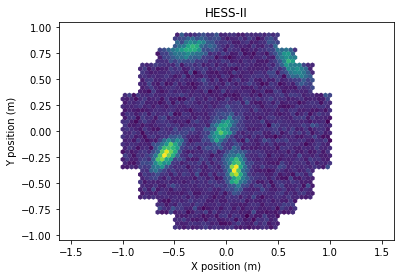

> (3/5) camgeom=VERITAS


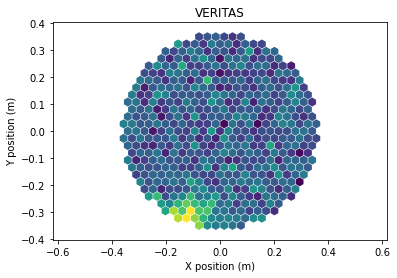

> (4/5) camgeom=Whipple109


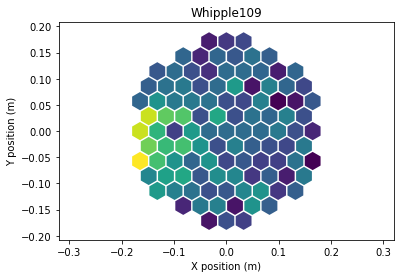

> (5/5) camgeom=Whipple151


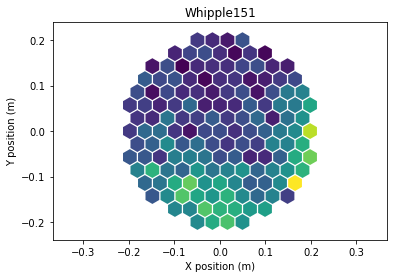

In [3]:
import astropy.units     as u
import matplotlib.pyplot as plt
import numpy             as np

from ctapipe.image         import toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

camgeoms = (
	'HESS-I',
	'HESS-II',
	'VERITAS',
	'Whipple109',
	'Whipple151'
)

camgeoms_len = len(camgeoms)

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom = CameraGeometry.from_name(camgeom)


	image = np.zeros(geom.n_pixels)

	for i in range(5):
		model = toymodel.Gaussian(
			x      = np.random.uniform(-0.8,  0.8)       * u.m,
			y      = np.random.uniform(-0.8,  0.8)       * u.m,
			width  = np.random.uniform( 0.05, 0.075)     * u.m,
			length = np.random.uniform( 0.1,  0.15)      * u.m,
			psi    = np.random.uniform( 0,    2 * np.pi) * u.rad)

		new_image, sig, bg = model.generate_image(
			geom,
			intensity    = np.random.uniform(1000, 3000),
			nsb_level_pe = 5)

		image += new_image


	disp = CameraDisplay(geom, image=image)
	plt.show(disp)

> (1/5) camgeom=HESS-I


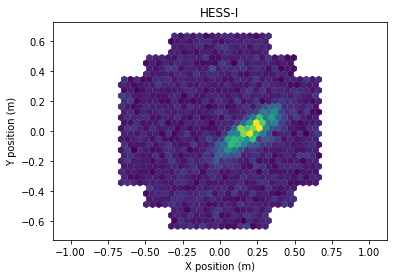

dict_keys(['n_pixels', 'camera_name', 'pix_id', 'pix_x', 'pix_y', 'pix_area', 'pix_type', 'pix_rotation', 'cam_rotation', '_neighbors', 'frame', 'border_cache'])
dict_keys(['x', 'y', 'width', 'length', 'psi'])
[ 2.08125 -0.91875  5.08125 -0.91875 -0.91875 -0.91875  0.08125 -3.91875
  1.08125 -1.91875  1.08125  3.08125  4.08125 -0.91875  0.08125  3.08125
  0.08125 -2.91875 -1.91875  0.08125 -1.91875  3.08125  0.08125  2.08125
 -3.91875 -2.91875  5.08125 -0.91875  0.08125 -1.91875  0.08125  6.08125
  0.08125 -0.91875 -0.91875 -2.91875  3.08125  2.08125 -2.91875 -1.91875
  5.08125  1.08125 -4.91875  2.08125  0.08125  1.08125  0.08125 -1.91875
 -1.91875  2.08125  1.08125 -0.91875  0.08125  0.08125 -1.91875 -1.91875
 -2.91875  2.08125  4.08125  5.08125  1.08125  1.08125 -3.91875  0.08125
  1.08125 -1.91875 -0.91875  2.08125 -1.91875 -0.91875 -0.91875 -3.91875
  1.08125  1.08125 -2.91875  2.08125 -0.91875 -0.91875 -0.91875 -2.91875
 -2.91875 -3.91875  2.08125 -1.91875 -1.91875  0.08125 -1.91

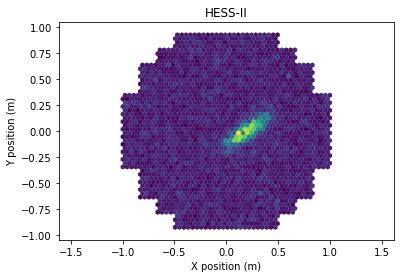

dict_keys(['n_pixels', 'camera_name', 'pix_id', 'pix_x', 'pix_y', 'pix_area', 'pix_type', 'pix_rotation', 'cam_rotation', '_neighbors', 'frame', 'border_cache'])
dict_keys(['x', 'y', 'width', 'length', 'psi'])
[-0.97802734  3.02197266  2.02197266 ... -1.97802734 -0.97802734
  1.02197266]
dict_keys(['axes', 'pixels', 'colorbar', 'autoupdate', 'autoscale', '_active_pixel', '_active_pixel_label', '_axes_overlays', 'geom', 'mask', 'pixel_highlighting'])
> (3/5) camgeom=VERITAS


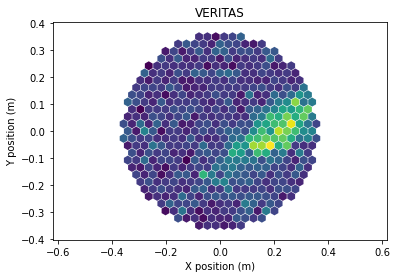

dict_keys(['n_pixels', 'camera_name', 'pix_id', 'pix_x', 'pix_y', 'pix_area', 'pix_type', 'pix_rotation', 'cam_rotation', '_neighbors', 'frame', 'border_cache'])
dict_keys(['x', 'y', 'width', 'length', 'psi'])
[ 1.96593186  3.96593186  0.96593186 -1.03406814 -0.03406814 -1.03406814
  1.96593186  3.96593186  4.96593186  4.96593186 -0.03406814 -0.03406814
 -2.03406814  1.96593186  1.96593186 -1.03406814 -0.03406814 -0.03406814
 -0.03406814  1.96593186  5.96593186 10.96593186 12.96593186  1.96593186
  0.96593186  2.96593186  4.96593186 -1.03406814 -0.03406814  0.96593186
 -0.03406814 -1.03406814  0.96593186 -1.03406814  0.96593186 -1.03406814
  1.96593186  8.96593186 13.96593186  9.96593186 10.96593186  6.96593186
  6.96593186  3.96593186  0.96593186 -1.03406814  1.96593186 -0.03406814
  2.96593186 -2.03406814 -2.03406814 -3.03406814  0.96593186 -1.03406814
 -2.03406814 -0.03406814  2.96593186 -2.03406814 -3.03406814 -1.03406814
  1.96593186 14.96593186 14.96593186 19.96593186  3.96593186

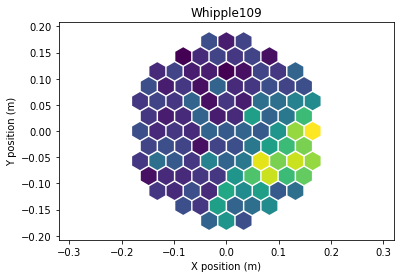

dict_keys(['n_pixels', 'camera_name', 'pix_id', 'pix_x', 'pix_y', 'pix_area', 'pix_type', 'pix_rotation', 'cam_rotation', '_neighbors', 'frame', 'border_cache'])
dict_keys(['x', 'y', 'width', 'length', 'psi'])
[ 2.9266055  3.9266055  1.9266055  0.9266055  3.9266055 -2.0733945
 -1.0733945  2.9266055  5.9266055  5.9266055  3.9266055  6.9266055
 -3.0733945 -1.0733945  3.9266055 -3.0733945 -0.0733945 -2.0733945
  9.9266055  8.9266055  9.9266055 19.9266055 13.9266055  8.9266055
 -0.0733945 -0.0733945 -0.0733945  0.9266055 -0.0733945 -1.0733945
  3.9266055 -3.0733945  3.9266055 -1.0733945 -0.0733945  4.9266055
  3.9266055 16.9266055 12.9266055 15.9266055 18.9266055  9.9266055
  7.9266055 10.9266055 -1.0733945  1.9266055 -1.0733945  2.9266055
  1.9266055 -1.0733945 -2.0733945 -0.0733945 -0.0733945 -2.0733945
 -2.0733945 -4.0733945 -3.0733945  0.9266055  1.9266055  4.9266055
  5.9266055 20.9266055 15.9266055 18.9266055 12.9266055  2.9266055
  7.9266055  4.9266055  3.9266055  9.9266055 -0.07339

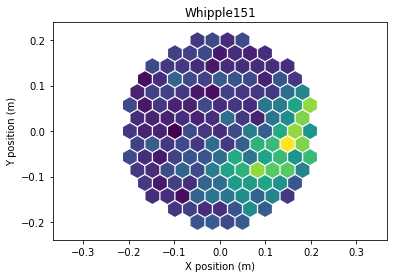

dict_keys(['n_pixels', 'camera_name', 'pix_id', 'pix_x', 'pix_y', 'pix_area', 'pix_type', 'pix_rotation', 'cam_rotation', '_neighbors', 'frame', 'border_cache'])
dict_keys(['x', 'y', 'width', 'length', 'psi'])
[-1.02649007  1.97350993 -0.02649007  5.97350993 -0.02649007 -1.02649007
  5.97350993  7.97350993  3.97350993 13.97350993  5.97350993  2.97350993
 -0.02649007  1.97350993 -2.02649007  1.97350993 -1.02649007 -0.02649007
 -0.02649007  3.97350993 14.97350993  6.97350993 14.97350993 12.97350993
  7.97350993  1.97350993  2.97350993  1.97350993 -5.02649007 -1.02649007
 -2.02649007 -3.02649007 -4.02649007  0.97350993 -0.02649007 -1.02649007
 -2.02649007 13.97350993 15.97350993 12.97350993 20.97350993 11.97350993
 11.97350993  5.97350993  4.97350993 -1.02649007  4.97350993  0.97350993
 -0.02649007 -2.02649007 -2.02649007 -2.02649007 -0.02649007  1.97350993
  0.97350993  3.97350993  2.97350993  1.97350993 -0.02649007  6.97350993
  6.97350993 20.97350993 25.97350993 15.97350993 17.97350993

In [4]:
import astropy.units     as u
import matplotlib.pyplot as plt

from ctapipe.image         import toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

camgeoms = (
	'HESS-I',
	'HESS-II',
	'VERITAS',
	'Whipple109',
	'Whipple151'
)

camgeoms_len = len(camgeoms)

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom  = CameraGeometry.from_name(camgeom)
	model = toymodel.Gaussian(x = 0.2 * u.m, y = 0.0 * u.m, width = 0.05 * u.m, length = 0.15 * u.m, psi = '35d')

	image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

	disp = CameraDisplay(geom, image=image)
	plt.show(disp)


	print(vars(geom).keys())
	print(vars(model).keys())
	print(image)
	print(vars(disp).keys())